In [12]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [13]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Set the ticker
ticker = "DIS"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2017-12-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-07", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

DIS                                   
                             open    high       low   close   volume
time                                                                
2017-12-07 00:00:00-05:00  105.74  106.00  104.4900  105.29  6534555
2017-12-08 00:00:00-05:00  104.91  104.98  104.0775  104.23  5115228
2017-12-11 00:00:00-05:00  104.89  106.84  104.7900  106.81  5627987
2017-12-12 00:00:00-05:00  107.60  107.83  106.5850  107.40  5795523
2017-12-13 00:00:00-05:00  108.11  108.15  106.7100  107.61  8343282

In [15]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_DIS = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [16]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_DIS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998574,1.039852,1.003467,0.975917,1.003034,1.000225,0.994019,1.020010,1.025736,1.014281,...,1.039252,0.966295,0.977887,1.009083,1.004792,0.998711,0.979072,0.961077,0.990340,1.054009
2,1.002290,1.049288,0.982099,0.979822,0.968155,1.021950,1.027294,1.042782,1.019899,1.046674,...,1.054502,0.971887,0.967452,1.016205,0.986356,0.976795,0.968959,0.942822,1.009720,1.031622
3,1.005565,1.057981,0.972974,0.983975,0.921021,0.983751,1.066234,1.020690,1.062208,1.046026,...,1.057145,0.992224,0.989607,1.005813,0.976137,0.989952,0.973607,0.932152,0.995765,1.051945
4,1.025664,1.078008,0.966707,0.957612,0.913726,1.007667,1.070720,1.003127,1.093836,1.040429,...,1.042863,0.963233,0.983027,1.003186,0.976155,0.992618,0.976804,0.910404,1.015993,1.052872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.986779,1.015831,8.330986,1.231110,2.248299,3.625078,0.717434,1.142954,7.537246,0.800797,...,8.908376,4.498446,1.154653,4.534107,3.037947,2.487185,1.217346,2.303193,1.814301,1.941941
1257,1.015437,1.017755,8.355288,1.236986,2.290870,3.528759,0.722676,1.162619,7.465962,0.798991,...,8.788423,4.476216,1.174969,4.673802,2.926689,2.432981,1.194481,2.193359,1.814545,1.924501
1258,0.972005,1.050686,8.299934,1.239033,2.317463,3.647854,0.711991,1.180999,7.459333,0.816732,...,8.870054,4.387983,1.177554,4.615528,2.885488,2.426859,1.150878,2.211295,1.880291,1.905964
1259,0.948036,1.062866,8.261947,1.213420,2.291791,3.608791,0.730361,1.214220,7.775940,0.825216,...,9.063187,4.485749,1.177746,4.669589,2.868002,2.396405,1.146749,2.245351,1.865263,1.907730


In [17]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_DIS.simulated_return.mean(axis=1)),
    "median": list(MC_DIS.simulated_return.median(axis=1)),
    "min": list(MC_DIS.simulated_return.min(axis=1)),
    "max": list(MC_DIS.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001134,1.000588,0.948044,1.065304
2,1.001872,0.999146,0.925663,1.093366
3,1.003195,1.000760,0.901395,1.109762
4,1.004647,1.003157,0.871250,1.121709


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of DIS Stock Over the Next Year'}>

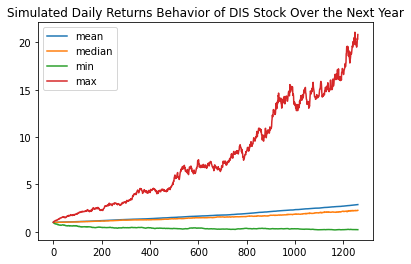

In [18]:
 # Use the `plot` function to visually analyze the trajectory of DIS stock daily returns on the next 5 years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of DIS Stock Over the Next Year")

In [19]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_DIS.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.876847
std               2.392482
min               0.227435
25%               1.279790
50%               2.271954
75%               3.621206
max              20.836217
95% CI Lower      0.632900
95% CI Upper      9.142806
Name: 1260, dtype: float64


In [20]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $6329.0 and $91428.06.
